# Assignment 1A - Question 1
## Regression
import required python libraries

In [25]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures

import data from '/CAB420_Assessment_1A_Data/Data/Q1/communities.csv'

In [26]:
data = pandas.read_csv('CAB420_Assessment_1A_Data\Data\Q1\communities.csv')
data.head()

,state,county,community,communityname string,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [27]:
data.shape

(1994, 128)

remove first 5 columns from dataset

In [31]:
data_to_use = data.iloc[:,5:]
data_to_use[data_to_use == "?"] = np.nan # change all "?" to NaN
data_to_use = data_to_use.dropna()

In [32]:
data_to_use.shape

(319, 123)

In [94]:
columns = data_to_use.columns.tolist()
print(columns)

[' population ', ' householdsize ', ' racepctblack ', ' racePctWhite ', ' racePctAsian ', ' racePctHisp ', ' agePct12t21 ', ' agePct12t29 ', ' agePct16t24 ', ' agePct65up ', ' numbUrban ', ' pctUrban ', ' medIncome ', ' pctWWage ', ' pctWFarmSelf ', ' pctWInvInc ', ' pctWSocSec ', ' pctWPubAsst ', ' pctWRetire ', ' medFamInc ', ' perCapInc ', ' whitePerCap ', ' blackPerCap ', ' indianPerCap ', ' AsianPerCap ', ' OtherPerCap ', ' HispPerCap ', ' NumUnderPov ', ' PctPopUnderPov ', ' PctLess9thGrade ', ' PctNotHSGrad ', ' PctBSorMore ', ' PctUnemployed ', ' PctEmploy ', ' PctEmplManu ', ' PctEmplProfServ ', ' PctOccupManu ', ' PctOccupMgmtProf ', ' MalePctDivorce ', ' MalePctNevMarr ', ' FemalePctDiv ', ' TotalPctDiv ', ' PersPerFam ', ' PctFam2Par ', ' PctKids2Par ', ' PctYoungKids2Par ', ' PctTeen2Par ', ' PctWorkMomYoungKids ', ' PctWorkMom ', ' NumIlleg ', ' PctIlleg ', ' NumImmig ', ' PctImmigRecent ', ' PctImmigRec5 ', ' PctImmigRec8 ', ' PctImmigRec10 ', ' PctRecentImmig ', ' PctRe

plot data_to_use

Text(0.5, 1.0, 'Total Crimes')

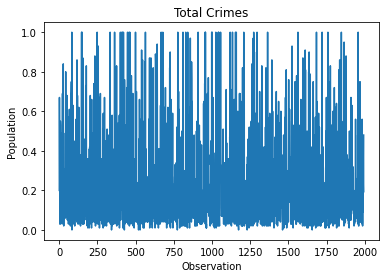

In [48]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(data[' ViolentCrimesPerPop '].values)
ax.set_xlabel('Observation')
ax.set_ylabel('Population')
ax.set_title('Total Crimes')

Split data into training, test and validation sets using Week 1 Example 1 train - 70% test - 30%

In [70]:
data_train = data.loc[(data[' population '] <= 0.1)]
data_test = data.loc[(data[' population '] > 0.1)]
print(data_train.shape)
print(data_test.shape)

(1750, 128)
(244, 128)


check correlation between predictors

In [ ]:
fig = plt.figure(figsize=[10, 10])
ax = fig.add_subplot(2, 2, 1)
ax.scatter(data_train[' population '], data_train[' ViolentCrimesPerPop '])
ax.set_xlabel('Population')
ax.set_ylabel('Number of Violent Crimes')
ax.set_title(str(data_train[' ViolentCrimesPerPop '].corr(data_train[' population '])))
ax = fig.add_subplot(2, 2, 2)
ax.scatter(data_train['temp'], data_train[' ViolentCrimesPerPop '])
ax.set_xlabel('temp')
ax.set_ylabel('Number of People in Lyrca')
ax.set_title(str(data_train[' ViolentCrimesPerPop '].corr(data_train['temp'])))
ax = fig.add_subplot(2, 2, 3)
ax.scatter(data_train['hum'], data_train[' ViolentCrimesPerPop '])
ax.set_xlabel('hum')
ax.set_ylabel('Number of People in Lyrca')
ax.set_title(str(data_train[' ViolentCrimesPerPop '].corr(data_train['hum'])))
ax = fig.add_subplot(2, 2, 4)
ax.scatter(data_train['windspeed'], data_train[' ViolentCrimesPerPop '])
ax.set_xlabel('windspeed')
ax.set_ylabel('Number of People in Lyrca')
ax.set_title(str(data_train[' ViolentCrimesPerPop '].corr(data_train['windspeed'])))

In [103]:
fig = plt.figure(figsize=[10, 10])
for i in range(0, np.size(columns)):
    ax = fig.add_subplot(2, 2, i+1)
    ax.scatter(data_train['{0}', columns[i], data_train[' ViolentCrimesPerPop ']])
    ax.set_xlabel('{0}', columns[i])
    ax.set_ylabel('Number of Violent Crimes')
    ax.set_title(str(data_train[' ViolentCrimesPerPop '].corr(data_train['{0}', columns[i]])))

TypeError: '('{0}', ' population ', 1       0.67
2       0.43
3       0.12
4       0.03
5       0.14
        ... 
1987    0.04
1988    0.19
1989    0.09
1990    0.45
1992    0.19
Name:  ViolentCrimesPerPop , Length: 1750, dtype: float64)' is an invalid key

In [97]:
for i in range(0, np.size(data_to_use.columns.tolist())):
    print(columns[i])

 population 
 householdsize 
 racepctblack 
 racePctWhite 
 racePctAsian 
 racePctHisp 
 agePct12t21 
 agePct12t29 
 agePct16t24 
 agePct65up 
 numbUrban 
 pctUrban 
 medIncome 
 pctWWage 
 pctWFarmSelf 
 pctWInvInc 
 pctWSocSec 
 pctWPubAsst 
 pctWRetire 
 medFamInc 
 perCapInc 
 whitePerCap 
 blackPerCap 
 indianPerCap 
 AsianPerCap 
 OtherPerCap 
 HispPerCap 
 NumUnderPov 
 PctPopUnderPov 
 PctLess9thGrade 
 PctNotHSGrad 
 PctBSorMore 
 PctUnemployed 
 PctEmploy 
 PctEmplManu 
 PctEmplProfServ 
 PctOccupManu 
 PctOccupMgmtProf 
 MalePctDivorce 
 MalePctNevMarr 
 FemalePctDiv 
 TotalPctDiv 
 PersPerFam 
 PctFam2Par 
 PctKids2Par 
 PctYoungKids2Par 
 PctTeen2Par 
 PctWorkMomYoungKids 
 PctWorkMom 
 NumIlleg 
 PctIlleg 
 NumImmig 
 PctImmigRecent 
 PctImmigRec5 
 PctImmigRec8 
 PctImmigRec10 
 PctRecentImmig 
 PctRecImmig5 
 PctRecImmig8 
 PctRecImmig10 
 PctSpeakEnglOnly 
 PctNotSpeakEnglWell 
 PctLargHouseFam 
 PctLargHouseOccup 
 PersPerOccupHous 
 PersPerOwnOccHous 
 PersPerRentOcc